In [1]:
# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import pickle
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [2]:
# Load and check data
with open('Data Sets/data_set3.pickle','rb') as read_file:
    recipe_data = pickle.load(read_file)

recipe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   4809 non-null   object        
 1   number_of_steps        4793 non-null   float64       
 2   number_of_ratings      4809 non-null   float64       
 3   rating_value           4143 non-null   float64       
 4   author                 4809 non-null   object        
 5   recipe_time            4748 non-null   object        
 6   number_of_ingredients  4809 non-null   int64         
 7   number_of_servings     4809 non-null   object        
 8   image_link             4809 non-null   object        
 9   recipe_link            4809 non-null   object        
 10  recipe_start_date      4724 non-null   datetime64[ns]
 11  name_other             4809 non-null   object        
 12  recipe_categories      4809 non-null   object        
 13  mai

In [3]:
model_data = recipe_data.drop(columns = ['name', 'recipe_time', 'number_of_servings', 
                                         'image_link', 'recipe_link', 'recipe_start_date', 
                                         'name_other', 'recipe_categories', 'recipe_keywords'
                                        ])

model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   number_of_steps        4793 non-null   float64
 1   number_of_ratings      4809 non-null   float64
 2   rating_value           4143 non-null   float64
 3   author                 4809 non-null   object 
 4   number_of_ingredients  4809 non-null   int64  
 5   main_course            4809 non-null   bool   
 6   dinner                 4809 non-null   bool   
 7   side_dish              4809 non-null   bool   
 8   easy                   4809 non-null   bool   
 9   dessert                4809 non-null   bool   
 10  quick                  4809 non-null   bool   
 11  weekday                4809 non-null   bool   
 12  appetizer              4809 non-null   bool   
 13  lunch                  4809 non-null   bool   
 14  vegetarian             4809 non-null   bool   
 15  fall

In [4]:
# Three variables have nulls - number of steps, rating value, and days ago. 
# I'm choosing to fill in the nulls with mean because I don't think zeros accurately reflect the values
model_data.fillna(model_data.mean(), inplace = True)
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   number_of_steps        4809 non-null   float64
 1   number_of_ratings      4809 non-null   float64
 2   rating_value           4809 non-null   float64
 3   author                 4809 non-null   object 
 4   number_of_ingredients  4809 non-null   int64  
 5   main_course            4809 non-null   bool   
 6   dinner                 4809 non-null   bool   
 7   side_dish              4809 non-null   bool   
 8   easy                   4809 non-null   bool   
 9   dessert                4809 non-null   bool   
 10  quick                  4809 non-null   bool   
 11  weekday                4809 non-null   bool   
 12  appetizer              4809 non-null   bool   
 13  lunch                  4809 non-null   bool   
 14  vegetarian             4809 non-null   bool   
 15  fall

In [5]:

model_data.corr()

number_of_steps  number_of_ratings  rating_value  \
number_of_steps               1.000000           0.022249     -0.052502   
number_of_ratings             0.022249           1.000000      0.202867   
rating_value                 -0.052502           0.202867      1.000000   
number_of_ingredients         0.350930           0.038327      0.036926   
main_course                   0.055796           0.141124      0.012880   
dinner                        0.037847           0.102922      0.017025   
side_dish                    -0.098242          -0.060962     -0.037609   
easy                         -0.226586           0.051739      0.050338   
dessert                       0.145295          -0.012864     -0.012170   
quick                        -0.192449           0.022768      0.083162   
weekday                      -0.070350           0.135965      0.039619   
appetizer                    -0.061163          -0.068595     -0.013342   
lunch                         0.019445           0.091764      0.019342   
vegetarian                   -0.156731          -0.045710      0.013081   
fall                         -0.019308          -0.008055     -0.054416   
winter                        0.024881          -0.010877     -0.016290   
summer                       -0.049918          -0.021760      0.015155   
days_ago                     -0.206408          -0.213497      0.106790   
recipe_time_in_min            0.196175           0.004940     -0.053146   

                       number_of_ingredients  main_course    dinner  \
number_of_steps                     0.350930     0.055796  0.037847   
number_of_ratings                   0.038327     0.141124  0.102922   
rating_value                        0.036926     0.012880  0.017025   
number_of_ingredients               1.000000     0.221397  0.190433   
main_course                         0.221397     1.000000  0.690344   
dinner                              0.190433     0.690344  1.000000   
side_dish                          -0.188251    -0.340166 -0.200724   
easy                               -0.223391     0.021673  0.029255   
dessert                            -0.016454    -0.451490 -0.390326   
quick                              -0.190024     0.030649  0.030061   
weekday                            -0.027776     0.239800  0.239021   
appetizer                          -0.018997    -0.158963 -0.061422   
lunch                               0.049186     0.194294  0.267939   
vegetarian                         -0.135976    -0.174541 -0.101614   
fall                                0.035749    -0.017384  0.029731   
winter                              0.066749    -0.004794  0.031842   
summer                             -0.036464    -0.036758 -0.021185   
days_ago                           -0.130087    -0.172345 -0.081155   
recipe_time_in_min                  0.168772     0.006107  0.018901   

                       side_dish      easy   dessert     quick   weekday  \
number_of_steps        -0.098242 -0.226586  0.145295 -0.192449 -0.070350   
number_of_ratings      -0.060962  0.051739 -0.012864  0.022768  0.135965   
rating_value           -0.037609  0.050338 -0.012170  0.083162  0.039619   
number_of_ingredients  -0.188251 -0.223391 -0.016454 -0.190024 -0.027776   
main_course            -0.340166  0.021673 -0.451490  0.030649  0.239800   
dinner                 -0.200724  0.029255 -0.390326  0.030061  0.239021   
side_dish               1.000000  0.069497 -0.150018  0.053992 -0.059939   
easy                    0.069497  1.000000 -0.099598  0.508248  0.113103   
dessert                -0.150018 -0.099598  1.000000 -0.104447 -0.143207   
quick                   0.053992  0.508248 -0.104447  1.000000  0.100667   
weekday                -0.059939  0.113103 -0.143207  0.100667  1.000000   
appetizer               0.047533  0.033769 -0.161400  0.054401 -0.046031   
lunch                   0.019438  0.017737 -0.144169  0.050940  0.073431   
vegetarian              0.259138  0.1

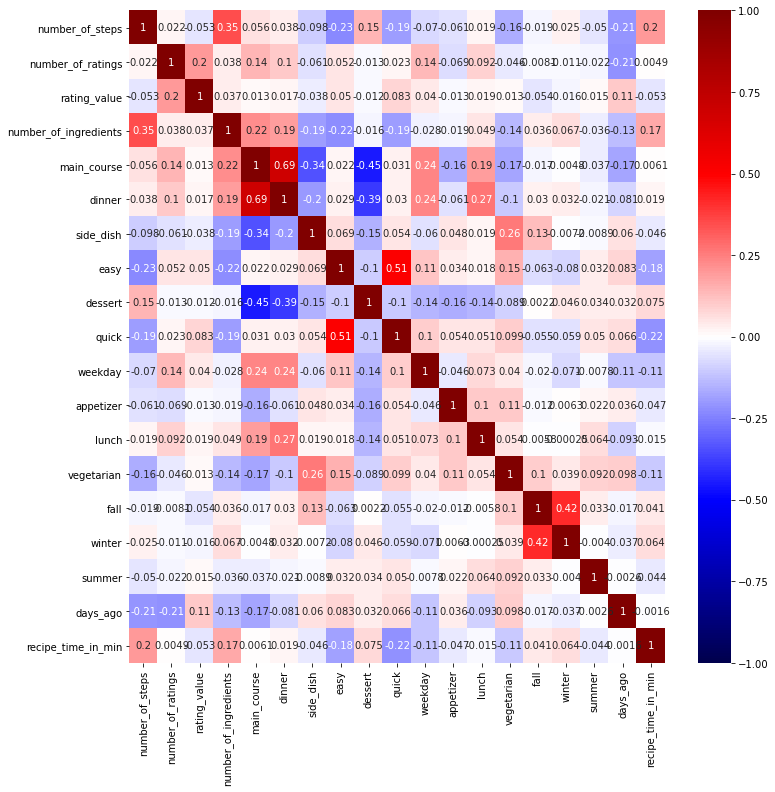

In [6]:
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(model_data.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, ax=ax);

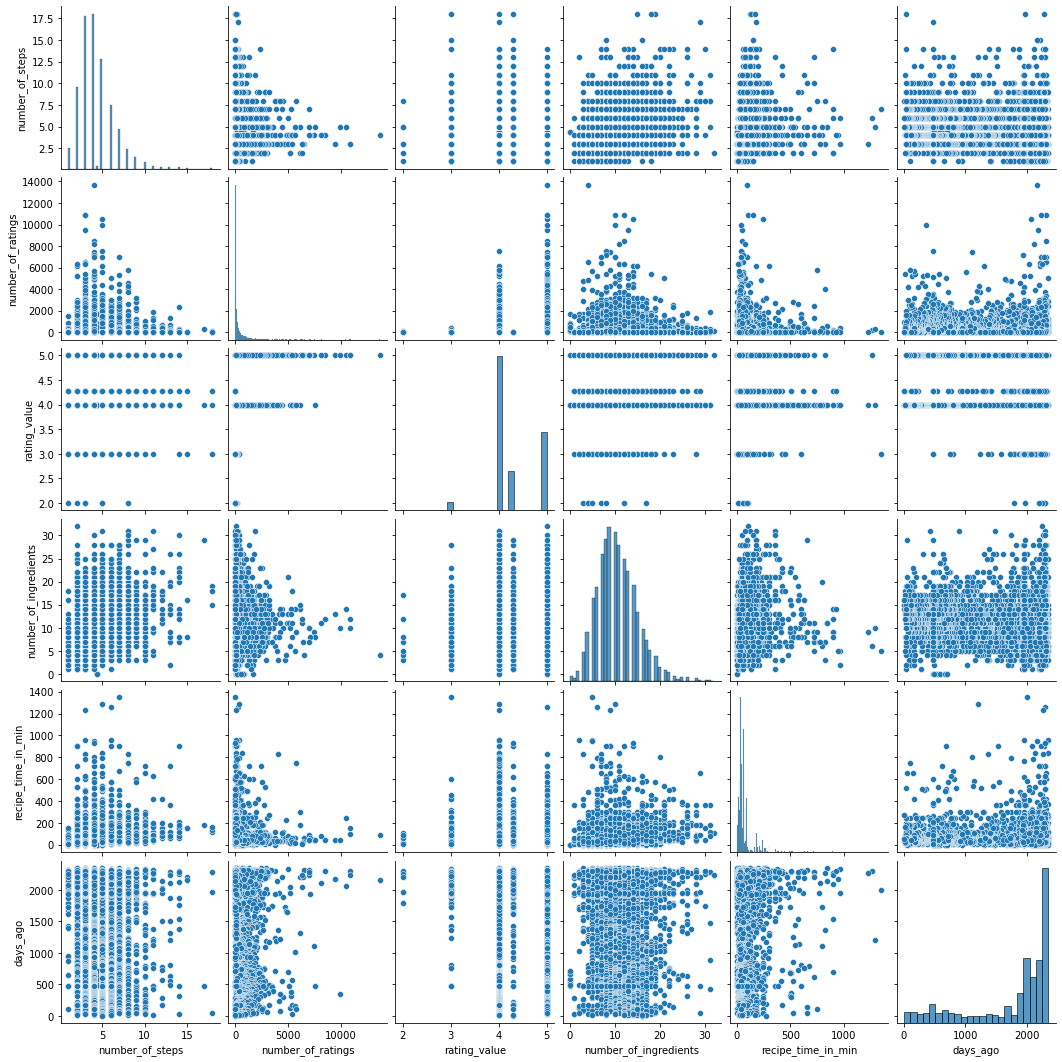

In [7]:
model_data_limited = model_data.loc[:,['number_of_steps', 'number_of_ratings', 'rating_value', 'number_of_ingredients', 'recipe_time_in_min', 'days_ago']]
sns.pairplot(model_data_limited);

In [8]:
model_data['days_ago_sq'] = model_data['days_ago']**2

In [9]:

X = model_data[['number_of_steps', 'rating_value', 'author',
                        'number_of_ingredients',  
                        'main_course', 'dinner', 'side_dish', 'easy',
                         'dessert', 'quick', 'weekday', 'appetizer', 'lunch', 'vegetarian', 
                         'fall', 'winter', 'summer', 'recipe_time_in_min', 'days_ago', 'days_ago_sq']]

y = model_data['number_of_ratings']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [10]:
selected_columns = ['rating_value', 'recipe_time_in_min', 'number_of_steps', 'days_ago',
                     'number_of_ingredients', 'days_ago_sq']

m = LinearRegression()
m.fit(X_train.loc[:,selected_columns],y_train)
m.score(X_train.loc[:,selected_columns],y_train)


0.0940169827098073

In [11]:
m.score(X_val.loc[:,selected_columns],y_val)

0.10869264765274467

In [12]:
from sklearn.preprocessing import PolynomialFeatures
m = LinearRegression()
p = PolynomialFeatures(degree=2)
m.fit(p.fit_transform(X_train.loc[:,selected_columns]),y_train)
m.score(p.transform(X_train.loc[:,selected_columns]),y_train)

0.1031590835444911

In [13]:
m.score(p.transform(X_val.loc[:,selected_columns]),y_val)

0.10180541640273644

In [14]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

m = LassoCV()
p = PolynomialFeatures(degree=2)
X_train_poly = p.fit_transform(X_train.loc[:,selected_columns])
s = StandardScaler(with_mean=False)
X_train_poly_scaled = s.fit_transform(X_train_poly)
m.fit(X_train_poly_scaled,y_train)
m.score(X_train_poly_scaled,y_train)

/Users/madelinevossbrinck/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157996.93721175194, tolerance: 154262.1569979202
  model = cd_fast.enet_coordinate_descent_gram(
/Users/madelinevossbrinck/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 382796.8068950176, tolerance: 154262.1569979202
  model = cd_fast.enet_coordinate_descent_gram(
/Users/madelinevossbrinck/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 678446.4635152817, tolerance: 154262.1569979202
  model = cd_fast.enet_coordinate_descent_gram(
/Users/madelinevos

0.1070371448562879

In [15]:
X = model_data[['number_of_steps', 'rating_value', 'author',
                        'number_of_ingredients',  
                        'main_course', 'dinner', 'side_dish', 'easy',
                         'dessert', 'quick', 'weekday', 'appetizer', 'lunch', 'vegetarian', 
                         'fall', 'winter', 'summer', 'recipe_time_in_min', 'days_ago', 'days_ago_sq']]

y = model_data['number_of_ratings']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)



In [16]:
selected_columns = ['rating_value', 'recipe_time_in_min', 'number_of_steps', 'days_ago',
                     'number_of_ingredients', 'main_course', 'dinner', 'side_dish', 'easy',
                        'vegetarian', 'days_ago_sq']

m = LinearRegression()
m.fit(X_train.loc[:,selected_columns],y_train)
m.score(X_train.loc[:,selected_columns],y_train)


0.11128888643239343

In [17]:
all_train = pd.concat([X_train, y_train], axis=1)
author_data = all_train.groupby('author').sum('number_of_ratings')
author_data.sort_values(by='number_of_ratings', ascending=False, inplace = True)
author_data.head(10)

number_of_steps  rating_value  number_of_ingredients  \
author                                                                      
Melissa Clark            1318.000000   1211.573497                   3262   
Mark Bittman              793.000000   1079.440985                   2011   
Sam Sifton                357.726476    331.573497                    755   
David Tanis               690.000000    666.000000                   1863   
Alison Roman              255.000000    188.000000                    489   
Ali Slagle                175.000000    170.000000                    370   
Julia Moskin              382.000000    363.286749                    857   
Martha Rose Shulman       673.000000    844.573497                   2040   
Colu Henry                112.000000    118.000000                    302   
The New York Times        118.000000    112.000000                    256   

                     main_course  dinner  side_dish  easy  dessert  quick  \
author                                                                      
Melissa Clark                141     115         34    50       66     49   
Mark Bittman                 137     118         58   100       20    101   
Sam Sifton                    53      40          9     8        3      9   
David Tanis                   93      84         31    21        9     32   
Alison Roman                  30      23          6     2        5      2   
Ali Slagle                    32      29          9    10        2     11   
Julia Moskin                  34      41         18    15       17     19   
Martha Rose Shulman           88      97         31    23       28     20   
Colu Henry                    27      26          3     3        0      5   
The New York Times            10      10          4    10       10      5   

                     weekday  appetizer  lunch  vegetarian  fall  winter  \
author                                                                     
Melissa Clark             50         21     40          60    28      32   
Mark Bittman              43         46     26          85    36      17   
Sam Sifton                14          7      9           8     5       2   
David Tanis               28         27     50          34    11      13   
Alison Roman              18          1      7           5     3       5   
Ali Slagle                24          7     10          15     5       5   
Julia Moskin               9         14     22          18     7       7   
Martha Rose Shulman       30         28     39         138    59      53   
Colu Henry                21          2      6           4     7       6   
The New York Times         4          2      6           8     4       2   

                     summer  recipe_time_in_min       days_ago   days_ago_sq  \
author                                                                         
Melissa Clark            38        20485.000000  421913.904318  8.066408e+08   
Mark Bittman             34        12085.000000  523230.582557  1.121490e+09   
Sam Sifton                6         7874.029155  129919.000000  2.544006e+08   
David Tanis              23         8870.000000  223344.678239  4.174582e+08   
Alison Roman              3         2120.000000   36191.000000  3.593920e+07   
Ali Slagle                2         2030.000000   20041.226080  1.283588e+07   
Julia Moskin              6         6969.514577  146421.452159  2.912086e+08   
Martha Rose Shulman      45        13437.000000  409937.356478  8.905410e+08   
Colu Henry                4         1020.000000   17391.000000  1.260685e+07   
The New York Times        1         3000.000000   49236.452159  1.019654e+08   

                     number_of_ratings  
author                                  
Melissa Clark                 183448.0  
Mark Bittman                  116898.0  
Sam Sifton                     74158.0  
David Tanis                    63287.0  
Alison Roman                   61910.0  
Ali Slagle

In [18]:
author_data2 = all_train.groupby('author').agg('count')
author_data2.sort_values(by='number_of_ratings', ascending=False, inplace = True)
author_data2.head(25)

number_of_steps  rating_value  \
author                                                             
Melissa Clark                                  271           271   
Mark Bittman                                   249           249   
Martha Rose Shulman                            192           192   
Florence Fabricant                             163           163   
Molly O'Neill                                  157           157   
David Tanis                                    147           147   
Pierre Franey                                  104           104   
Marian Burros                                  102           102   
Julia Moskin                                    84            84   
Sam Sifton                                      76            76   
Amanda Hesser                                   60            60   
Moira Hodgson                                   54            54   
Craig Claiborne                                 51            51   
Alison Roman                                    43            43   
Ali Slagle                                      41            41   
Nigella Lawson                                  41            41   
Jacques Pepin                                   34            34   
Craig Claiborne And Pierre Franey               31            31   
Kim Severson                                    31            31   
Nancy Harmon Jenkins                            30            30   
Samantha Seneviratne                            29            29   
Tejal Rao                                       29            29   
Colu Henry                                      27            27   
Joan Nathan                                     26            26   
The New York Times                              25            25   

                                   number_of_ingredients  main_course  dinner  \
author                                                                          
Melissa Clark                                        271          271     271   
Mark Bittman                                         249          249     249   
Martha Rose Shulman                                  192          192     192   
Florence Fabricant                                   163          163     163   
Molly O'Neill                                        157          157     157   
David Tanis                                          147          147     147   
Pierre Franey                                        104          104     104   
Marian Burros                                        102          102     102   
Julia Moskin                                          84           84      84   
Sam Sifton                                            76           76      76   
Amanda Hesser                                         60           60      60   
Moira Hodgson                                         54           54      54   
Craig Claiborne                                       51           51      51   
Alison Roman                                          43           43      43   
Ali Slagle                                            41           41      41   
Nigella Lawson                                        41           41      41   
Jacques Pepin                                         34           34      34   
Craig Claiborne And Pierre Franey                     31           31      31   
Kim Severson                                          31           31      31   
Nancy Harmon Jenkins                                  30           30      30   
Samantha Seneviratne                                  29           29      29   
Tejal Rao                                             29           29      29   
Colu Henry                                            27           27      27   
Joan Nathan                                           26           26      26   
The New York Times                                    25           25      25   

          

In [19]:
X_train['author_category'] = np.where(X_train['author'] == 'Melissa Clark', 'Melissa Clark',
                                     np.where(X_train['author'] == 'Mark Bittman', 'Mark Bittman',
                                     np.where(X_train['author'] == 'Julia Moskin', 'Julia Moskin', 
                                     np.where(X_train['author'] == 'David Tanis', 'David Tanis',
                                     np.where(X_train['author'] == 'Ali Slagle', 'Ali Slagle',
                                     np.where(X_train['author'] == 'Alison Roman', 'Alison Roman',
                                     np.where(X_train['author'] == 'Sam Sifton', 'Sam Sifton',
                                        'AAOther')))))))

X_train.head(10)

<ipython-input-19-3e9db4804e1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['author_category'] = np.where(X_train['author'] == 'Melissa Clark', 'Melissa Clark',


number_of_steps  rating_value               author  \
3437              3.0      4.000000         Mark Bittman   
1543              5.0      4.000000        Melissa Clark   
2420              5.0      4.000000         Alison Roman   
612               3.0      4.000000         Mark Bittman   
890               3.0      5.000000          David Tanis   
1605             10.0      5.000000         Samin Nosrat   
1206              2.0      5.000000       Suzanne Lenzer   
3093              3.0      4.286749        Molly O'Neill   
407               6.0      5.000000  Martha Rose Shulman   
1431              6.0      4.000000         Julia Moskin   

      number_of_ingredients  main_course  dinner  side_dish   easy  dessert  \
3437                      8        False   False      False   True    False   
1543                     10        False   False      False  False     True   
2420                      9         True    True      False  False    False   
612                       4        False   False      False   True    False   
890                      18         True   False      False  False    False   
1605                      4         True    True      False  False    False   
1206                      6         True   False      False  False    False   
3093                      7        False   False       True  False    False   
407                      11         True    True      False  False    False   
1431                      5         True   False      False  False    False   

      quick  ...  appetizer  lunch  vegetarian   fall  winter  summer  \
3437  False  ...       True  False       False  False   False   False   
1543  False  ...      False  False       False  False   False   False   
2420  False  ...      False  False       False  False   False   False   
612    True  ...       True  False       False  False   False   False   
890   False  ...      False  False       False  False   False   False   
1605  False  ...      False   True        True  False   False   False   
1206  False  ...      False  False       False  False   False   False   
3093  False  ...      False  False       False  False   False   False   
407   False  ...      False  False       False   True   False   False   
1431  False  ...      False  False       False  False   False   False   

      recipe_time_in_min  days_ago  days_ago_sq  author_category  
3437                20.0    2289.0    5239521.0     Mark Bittman  
1543               220.0    1461.0    2134521.0    Melissa Clark  
2420                45.0     345.0     119025.0     Alison Roman  
612                 10.0    2091.0    4372281.0     Mark Bittman  
890                 60.0    2293.0    5257849.0      David Tanis  
1605                45.0    1374.0    1887876.0          AAOther  
1206                30.0    2115.0    4473225.0          AAOther  
3093               220.0    2295.0    5267025.0          AAOther  
407                105.0    2238.0    5008644.0          AAOther  
1431               300.0    1679.0    2819041.0     Julia Moskin  

[10 rows x 21 columns]

In [20]:
#X_train['author_category']

cat_X = X_train.loc[:, ['author_category']]
cat_X_val = X_val

ohe = OneHotEncoder(drop= 'first', sparse=False)

ohe.fit(cat_X)
ohe_X = ohe.transform(cat_X)
columns = ohe.get_feature_names(['author_category'])
ohe_X_df = pd.DataFrame(ohe_X, columns = columns, index=cat_X.index)


In [21]:
combined_df = pd.concat([X_train, ohe_X_df], axis=1)
#combined_df.drop(columns = ['author', 'author_category', 'number_of_steps', 'appetizer'], inplace = True)
#combined_df = combined_df[['recipe_time_in_min', 'rating_value', 'days_ago', 'author_category_Ali Slagle', 'author_category_Alison Roman', 'author_category_David Tanis', 'author_category_Julia Moskin', 'author_category_Mark Bittman', 'author_category_Melissa Clark', 'author_category_Sam Sifton']]
#combined_df = combined_df[['number_of_steps', 'rating_value', 'number_of_ingredients', 'recipe_time_in_min', 
                           #'days_ago', 'days_ago_sq', 'author_category']]
#'number_of_ingredients',
combined_df = combined_df[['rating_value', 'recipe_time_in_min',
    'days_ago',                      
    'author_category_Ali Slagle', 'author_category_Alison Roman', 'author_category_David Tanis', 'author_category_Julia Moskin', 'author_category_Mark Bittman', 'author_category_Melissa Clark', 'author_category_Sam Sifton']]
#combined_df['recipe_time_in_min_sqrt'] = np.sqrt(combined_df['recipe_time_in_min'])

#combined_df.drop(columns = ['recipe_time_in_min'], inplace = True)
combined_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2885 entries, 3437 to 2793
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   rating_value                   2885 non-null   float64
 1   recipe_time_in_min             2885 non-null   float64
 2   days_ago                       2885 non-null   float64
 3   author_category_Ali Slagle     2885 non-null   float64
 4   author_category_Alison Roman   2885 non-null   float64
 5   author_category_David Tanis    2885 non-null   float64
 6   author_category_Julia Moskin   2885 non-null   float64
 7   author_category_Mark Bittman   2885 non-null   float64
 8   author_category_Melissa Clark  2885 non-null   float64
 9   author_category_Sam Sifton     2885 non-null   float64
dtypes: float64(10)
memory usage: 247.9 KB


In [22]:
combined_lr = LinearRegression()
combined_lr.fit(combined_df, y_train)
combined_lr.score(combined_df, y_train)

0.15316519177363952

In [23]:
combined_lr.coef_
list(zip(combined_df.columns,combined_lr.coef_))

[('rating_value', 343.79822242837906),
 ('recipe_time_in_min', 0.08334273284117533),
 ('days_ago', -0.22459795842996833),
 ('author_category_Ali Slagle', 975.9180134688504),
 ('author_category_Alison Roman', 916.5324001266031),
 ('author_category_David Tanis', 4.080343867663764),
 ('author_category_Julia Moskin', 419.1224635786423),
 ('author_category_Mark Bittman', 241.9362638449921),
 ('author_category_Melissa Clark', 278.22397947021625),
 ('author_category_Sam Sifton', 646.102310103332)]

In [ ]:
from sklearn.metrics import mean_absolute_error

pred = combined_lr.predict(combined_df_test)
mae = mean_absolute_error(y_test,pred)
mae

In [ ]:
plt.scatter(y_test,pred)

In [ ]:
from sklearn.metrics import mean_squared_error

pred = combined_lr.predict(combined_df_test)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)

###### combined_df['res'] = combined_lr.predict(combined_df[['rating_value',  'recipe_time_in_min', 'days_ago', 'author_category_Ali Slagle', 'author_category_Alison Roman', 'author_category_David Tanis', 'author_category_Julia Moskin', 'author_category_Mark Bittman', 'author_category_Melissa Clark', 'author_category_Sam Sifton']]) - y_train
combined_train = pd.concat([combined_df, y_train], axis=1)
combined_train.sort_values(['res']).head(25)

In [ ]:
X_val['author_category'] = np.where(X_val['author'] == 'Melissa Clark', 'Melissa Clark',
                                     np.where(X_val['author'] == 'Mark Bittman', 'Mark Bittman',
                                     np.where(X_val['author'] == 'Julia Moskin', 'Julia Moskin', 
                                     np.where(X_val['author'] == 'David Tanis', 'David Tanis',
                                     np.where(X_val['author'] == 'Ali Slagle', 'Ali Slagle',
                                     np.where(X_val['author'] == 'Alison Roman', 'Alison Roman',
                                     np.where(X_val['author'] == 'Sam Sifton', 'Sam Sifton',
                                        'AAOther')))))))

cat_X_val = X_val.loc[:, ['author_category']]

ohe = OneHotEncoder(drop= 'first', sparse=False)

ohe.fit(cat_X_val)
ohe_X_val = ohe.transform(cat_X_val)
columns = ohe.get_feature_names(['author_category'])
ohe_X_df_val = pd.DataFrame(ohe_X_val, columns = columns, index=cat_X_val.index)
combined_df_val = pd.concat([X_val, ohe_X_df_val], axis=1)

In [ ]:
combined_df_val = combined_df_val[['rating_value',  'recipe_time_in_min', 'days_ago',                      
    'author_category_Ali Slagle', 'author_category_Alison Roman', 'author_category_David Tanis', 'author_category_Julia Moskin', 'author_category_Mark Bittman', 'author_category_Melissa Clark', 'author_category_Sam Sifton']]
#combined_df_val['recipe_time_in_min_sqrt'] = np.sqrt(combined_df_val['recipe_time_in_min'])

#combined_df_val.drop(columns = ['recipe_time_in_min'], inplace = True)
combined_df_val.info()

In [ ]:
combined_lr.score(combined_df_val, y_val)

In [ ]:
X_test['author_category'] = np.where(X_test['author'] == 'Melissa Clark', 'Melissa Clark',
                                     np.where(X_test['author'] == 'Mark Bittman', 'Mark Bittman',
                                     np.where(X_test['author'] == 'Julia Moskin', 'Julia Moskin', 
                                     np.where(X_test['author'] == 'David Tanis', 'David Tanis',
                                     np.where(X_test['author'] == 'Ali Slagle', 'Ali Slagle',
                                     np.where(X_test['author'] == 'Alison Roman', 'Alison Roman',
                                     np.where(X_test['author'] == 'Sam Sifton', 'Sam Sifton',
                                        'AAOther')))))))

cat_X_test = X_test.loc[:, ['author_category']]

ohe = OneHotEncoder(drop= 'first', sparse=False)

ohe.fit(cat_X_test)
ohe_X_test = ohe.transform(cat_X_test)
columns = ohe.get_feature_names(['author_category'])
ohe_X_df_test = pd.DataFrame(ohe_X_test, columns = columns, index=cat_X_test.index)
combined_df_test = pd.concat([X_test, ohe_X_df_test], axis=1)

In [ ]:
combined_df_test = combined_df_test[['rating_value',  'recipe_time_in_min', 'days_ago',                      
    'author_category_Ali Slagle', 'author_category_Alison Roman', 'author_category_David Tanis', 'author_category_Julia Moskin', 'author_category_Mark Bittman', 'author_category_Melissa Clark', 'author_category_Sam Sifton']]
#combined_df_val['recipe_time_in_min_sqrt'] = np.sqrt(combined_df_val['recipe_time_in_min'])

#combined_df_val.drop(columns = ['recipe_time_in_min'], inplace = True)
combined_df_test.info()

In [ ]:
combined_lr.score(combined_df_test, y_test)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
combined_df.drop(columns = 'res', inplace = True)
m = LinearRegression()
p = PolynomialFeatures(degree=2, interaction_only = True)
m.fit(p.fit_transform(combined_df),y_train)
m.score(p.transform(combined_df),y_train)

In [ ]:
m.score(p.transform(combined_df_val),y_val)

In [ ]:
# 

m = LassoCV()
p = PolynomialFeatures(degree=2)
X_train_poly = p.fit_transform(combined_df)
s = StandardScaler(with_mean=False)
X_train_poly_scaled = s.fit_transform(X_train_poly)
m.fit(X_train_poly_scaled,y_train)
m.score(X_train_poly_scaled,y_train)
#m.coef_

In [ ]:
X_val_poly = p.transform(combined_df_val)
X_val_poly_scaled = s.transform(X_val_poly)
m.score(X_val_poly_scaled,y_val)

In [ ]:
combined_df['y_hat'] = combined_lr.predict(combined_df[['rating_value',  'recipe_time_in_min', 'days_ago', 'author_category_Ali Slagle', 'author_category_Alison Roman', 'author_category_David Tanis', 'author_category_Julia Moskin', 'author_category_Mark Bittman', 'author_category_Melissa Clark', 'author_category_Sam Sifton']])

In [ ]:
list(zip(p.get_feature_names(combined_df.columns),m.coef_))

In [ ]:
plt.plot(y_train, 'o')

In [ ]:
combined_df.sort_values(by='number_of_ratings', ascending=False, inplace = True)
combined_df.head(25)

In [ ]:
selected_columns = ['rating_value', 'recipe_time_in_min', 'number_of_steps', 'days_ago'
                     'number_of_ingredients' , 'main_course', 'dinner', 'side_dish', 'easy',
                         'dessert', 'quick', 'weekday', 'appetizer', 'lunch', 'vegetarian', 
                        'fall', 'winter', 'summer', 'days_ago_sq']

m = LinearRegression()
m.fit(X_train.loc[:,selected_columns],y_train)
m.score(X_train.loc[:,selected_columns],y_train)

In [ ]:
ind_author = model_data[ model_data['author'] == 'Julia Moskin']
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = ind_author['rating_value'], y = ind_author['number_of_ratings'])

In [ ]:
test = model_data.groupby('author').sum('number_of_ratings')

In [ ]:
test.sort_values(by='number_of_ratings', ascending=False, inplace = True)
test.head(25)

In [ ]:
all_train = pd.concat([X_train, y_train], axis=1)
test = all_train.groupby('author').sum('number_of_ratings')
test.sort_values(by='number_of_ratings', ascending=False, inplace = True)
test.head(25)